<a href="https://colab.research.google.com/github/nedokormysh/Stepik_Competitive_DS/blob/week_4/Competitive_ML4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1.3

Какие параметры надо уменьшить/увеличить, чтоб улучшить обобщающую способность?

* l2_leaf_reg (reg_lambda) - коэффициент регуляризации функции потерь;
* min_data_in_leaf (min_child_samples) - минимальное количество обучающих выборок в листе.
* max_leaves (num_leaves) - максимальное количество листьев в дереве;
* subsample - часть исходной выборки, отбираемая для обучения каждого дерева;
* colsample_bylevel - доля признаков, используемая для отбора на каждом сплите;
* max_bin - максимальное число бинов, на которые разбиваются признаки

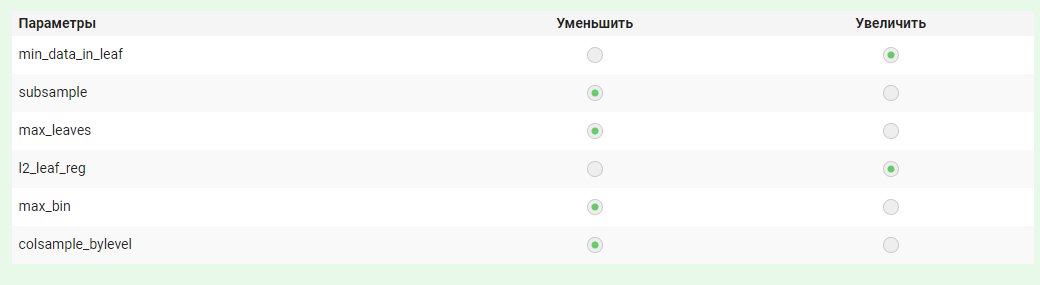

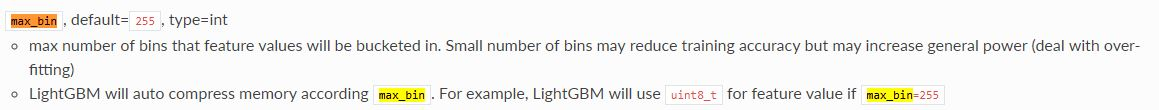

min_data_in_leaf: если у нас в листе мало образцов попало, то мы подстраиваем каждый лист под каждый образец. Следовательно следует увеличивать.

subsample: если использовать всю выборку из исходной для обучения, то мы будем переобучаться на ней. Т.е. чем меньше данных мы будем использовать для обучения - тем более генерализированные результаты будем получать.

max_leaves: дерево с неограниченным количеством листьев имеет высокую дисперсию, то есть получаемый результат сильно зависит от случайных изменений в обучающей выборке (например, мы удалили часть примеров или добавили новые). В общем, мы просто пытаемся ограничить сложность дерева. Т.е. мы можем разделить ещё по какому-то признаку, точнее его значению. Но при этом возможно в тестовом части не будет подобных объектов. Уменьшать количество.

l2_reg: вносим штраф за высокие веса. Высокие веса - более сложная функция. Нам надо вносить большие штрафы. Увеличиваем.

max_bin: видимо мы разделяем наши непрерывные числовые признаки на бины. И соответсвенно, чем больше бинов, тем сложнее будет модель. Нам нужно наоборот.

colsample_bylevel: чем больше признаков используем для отбора в каждом разделении, тем более сложная модель. Уменьшаем.

https://www.kaggle.com/code/marychin/num-leaves-min-data-in-leaf-a-lightgbm-demo

https://habr.com/ru/company/otus/blog/527554/

https://stackoverflow.com/questions/51022822/subsample-colsample-bytree-colsample-bylevel-in-xgbclassifier-python-3-x

https://neptune.ai/blog/lightgbm-parameters-guide

https://konstantinklepikov.github.io/myknowlegebase/notes/lightgbm-parameters-tuning

https://python-school.ru/blog/regularization-l1-l2/

https://medium.com/analytics-vidhya/xgboost-colsample-by-hyperparameters-explained-6c0bac1bdc1

num_leaves: the maximum number of leaves per tree (default is 31; higher num_leaves means less conservative/control, potentially overfitting);

min_data_in_leaf: the minimum number of data/sample/count per leaf (default is 20; lower min_data_in_leaf means less conservative/control, potentially overfitting).

As known large l2 regularization coefficient leads to model under-fitting. You can check the leaf values in your example - they are closed to zero (cat.get_leaf_values()).
By default CatBoost uses oblivious tree structure - it means that on each level docs are split with the same condition. (documentation ) This condition could be trivial for some branches of decision tree as in your example, but never trivial for all branches. You can use cat.plot_tree(0) function to see tree structure).

Одной из основных причин отсутствия у модели обобщающей способности является эффект переобучения. Для снижения вероятности переобучения и улучшения обобщающей способности модели можно произвести следующие действия:

Уменьшить число настраиваемых в процессе обучения параметров модели (например, весов нейронной сети), оставив число примеров в обучающем множестве без изменений.
Увеличить число обучающих примеров при фиксированном числе настраиваемых параметров.
Уменьшить число итераций алгоритма обучения, возможно даже за счет некоторого увеличения ошибки обучения.
Использовать специальные методы формирования выборки для обучения, такие как, например, перекрестная проверка.

https://github.com/catboost/catboost/issues/1408

# 4.1.4

Выберите верное о четверке базовых параметров в Catboost 
iterations (синонимы num_boost_round, n_estimators, num_trees) - максимальное количество деревьев, используемых в модели (по умолчанию 1000). Значение может быть ниже заданного, если используются другие параметры, накладывающие ограничение на количество деревьев;

learning_rate - скорость обучения;

depth (max_depth) - глубина дерева (по умолчанию 6, максимальное значение - 16); 

cat_features - список наименований категориальных признаков

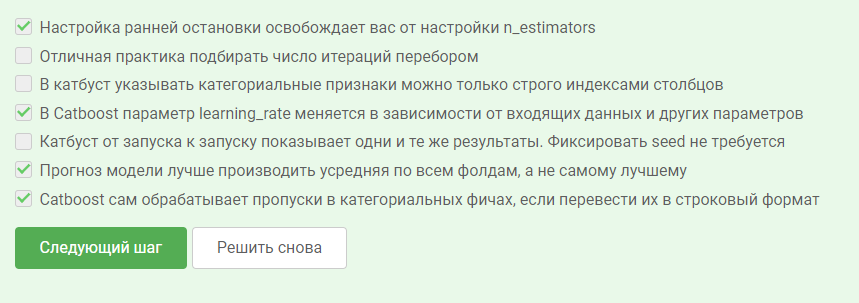

https://proglib.io/p/reshaem-zadachi-mashinnogo-obucheniya-s-pomoshchyu-algoritma-gradientnogo-bustinga-2021-11-25

В бустинге мы применяем полседовательно слабые модели. Каждая следующая модель исправляет ошибку предыдущей. n_estimators - количество таких итераций. Если видим, что ошибка не изменяется, то следующую итерацию можно не ставить.

Число итераций перебором - неизвестно насколько эффективная практика.

В катбуст мы подаём название столбцов.

Катбуст умеет подстраиваться под данные. И меняет градиентный шаг.

Сид следует фиксировать всегда. Не совсем понимаю на что влияет random_seed. Видимо, например, какие данные будут взяты из выборки для обучения.

Если делаем прогноз модели на лучшем фолде, то зачем делать кросс-валидацию?

Катбуст не обрабатывает пропуски в данных.

# 4.1.5
Ниже приведено обучение модели с результатами логов обучения. В целом, все работает, но что-то все же тут не так. А что?

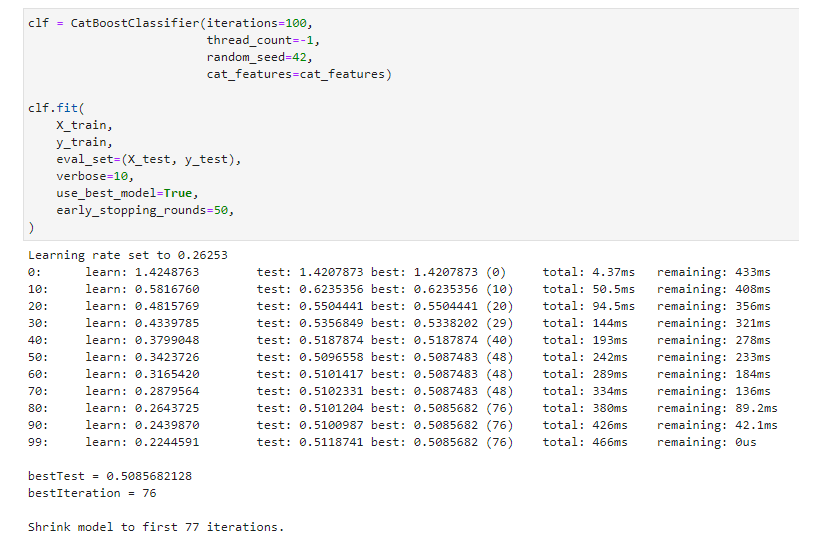

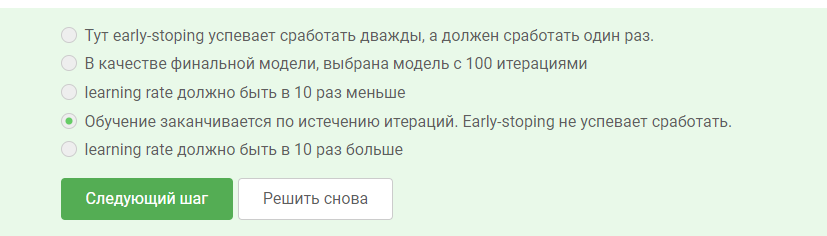

# 4.1.6

Для какой задачи можно посчитать Object importance в CatBoost?

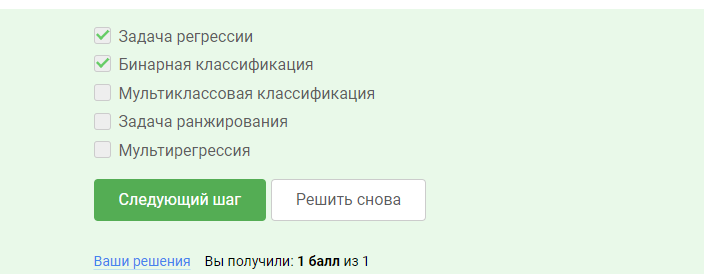

# 4.1.7

Какие «батарейки» есть в CatBoost из коробки?

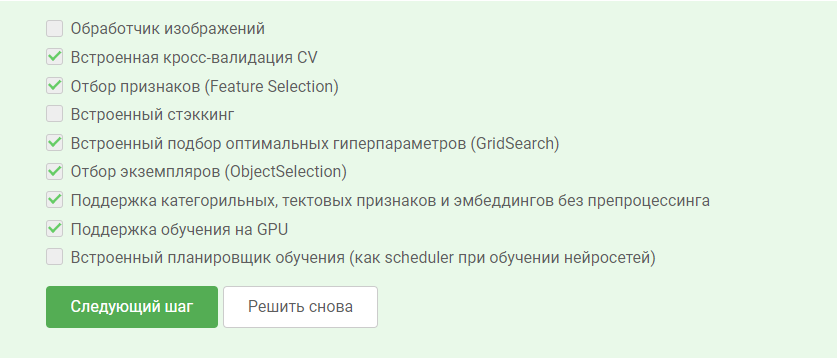

# 4.1.8

Точность модели на CPU  и GPU.
Возможно вы замечали, что точность CatBoost при обучении на CPU и GPU может на несколько процентов отличаться (мы неоднократно замечали) при том, что все остальные гиперпараметры кроме task_type остаются такими же. Это связано с различными дефолтными значениеми одного из гиперпараметров для CPU и GPU.

Чтобы получать примерно равную точность независимо от использованного ускорителя, рекомендуется вручную указывать значение этого гиперпараметра. Так же, изменяя его значение, можно влиять на качество модели.

Найдите в документации название гиперпараметра и значение, которое ему нужно присвоить, если вы переходите с CPU на GPU и хотите получить такую же точность.

Заполните пропуски:

название_параметра=значение (без кавычек и пробелов)

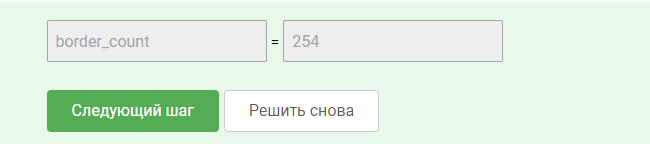

Border count
The number of splits for numerical features.

The default value depends on the processing unit type and other parameters:

CPU: 254
GPU in PairLogitPairwise and YetiRankPairwise modes: 32
GPU in all other modes: 128

# 4.1.9

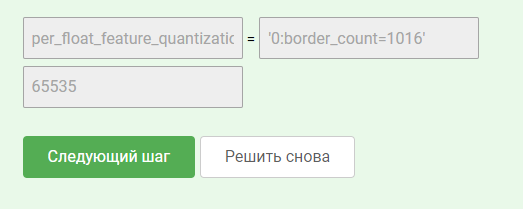

# 4.1.10

In [2]:
!pip install catboost -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779917/CB_bin_target_data.csv')
df

,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq,target_bin
0,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,4.737759,1.214131e+07,0.10,180.855726,0.023174,174,170,0
1,VW Polo VI,economy,petrol,3.90,2015,78218,2021,4.480517,1.803909e+07,0.00,187.862734,12.306011,174,174,0
2,Renault Sandero,standart,petrol,6.30,2012,23340,2017,4.768391,1.588366e+07,0.10,102.382857,2.513319,174,173,0
3,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,3.880920,1.651883e+07,0.10,172.793237,-5.029476,174,170,0
4,Renault Sandero,standart,petrol,4.70,2012,26428,2017,4.181149,1.398317e+07,0.10,203.462289,-14.260456,174,171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,Smart ForFour,economy,petrol,4.38,2017,121239,2018,4.608908,1.739222e+07,0.10,141.502350,-6.624534,174,171,0
2333,Audi A4,premium,petrol,4.30,2016,107793,2020,4.683793,1.174052e+07,0.10,155.000000,-8.582467,174,169,0
2334,Kia Rio,economy,petrol,3.88,2015,80234,2019,4.655345,1.202022e+07,0.10,104.180940,-0.778524,174,172,0
2335,Renault Sandero,standart,petrol,4.50,2014,60048,2020,4.638333,1.788307e+07,0.10,200.000000,2.464975,174,171,0


In [ ]:
class P4Metric(object):
    def get_final_error(self, error, weight):
        return error / (weight + 1e-38)

    def is_max_optimal(self):
        return ####

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])

         # YOUR CODE HERE ...

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [91]:
# class P4Metric(object):
#     def get_final_error(self, error, weight):
#         return error / (weight + 1e-38)

#     def is_max_optimal(self):
#         return True

#     def evaluate(self, approxes, target, weight):
#         assert len(approxes) == 1
#         assert len(target) == len(approxes[0])

        
#         # print(len(target))
#         # approx = approxes[0]
#         preds = [0 for i in range(len(target))]
#         for i in range(len(target)):
          
#           e = np.exp(approxes[i])
          
#           p = e / (1 + e)
          
#           preds = [1 if el > 0.5 else 0 for el in p]
#           print(len(preds))

#         # # target = np.array(target)
#         print('hello')

  
#         tn, fp, fn, tp = confusion_matrix(target, preds).ravel()

#         p4metric = (4 * tp * tn) /(4 * tp * tn + (tp + tn) * (fp + fn))

#         return p4metric, 1

In [93]:
class P4Metric(object):
    def get_final_error(self, error, weight):
        return error / (weight + 1e-38)

    def is_max_optimal(self):
        return True

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])

        # print('hello')

        preds = [0 for i in range(len(target))]
        # print('hello')
        e = np.exp(approxes[0])
        # print('hello')
        p = e / (1 + e)
        # print('hello')
        preds = [1 if el > 0.5 else 0 for el in p]
        # print(preds)

        tn, fp, fn, tp = confusion_matrix(target, preds).ravel()
        # print(tn, fp, fn, tp)

        p4metric = (4 * tp * tn) /(4 * tp * tn + (tp + tn) * (fp + fn))
        # print(p4metric)

        return p4metric, 1

In [94]:
rides_info = pd.read_csv('https://stepik.org/media/attachments/lesson/779917/CB_bin_target_data.csv')

cat_cols = ['car_type', 'fuel_type', 'model']
X = rides_info.drop(['target_bin'], axis=1)
y = rides_info['target_bin']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(random_state=42,
                           cat_features=cat_cols,
                           eval_metric=P4Metric())

model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=50, plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.036983
0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 129ms	remaining: 2m 8s


/usr/local/lib/python3.9/dist-packages/catboost/core.py:1759: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'confusion_matrix': Cannot determine Numba type of <class 'function'>

File "<ipython-input-93-09e6a0b118cd>", line 23:
    def evaluate(self, approxes, target, weight):
        <source elided>

        tn, fp, fn, tp = confusion_matrix(target, preds).ravel()
        ^

  self._object._train(train_pool, test_pool, params, allow_clear_pool, init_model._object if init_model else None)


50:	learn: 0.6618212	test: 0.5148397	best: 0.5148397 (50)	total: 936ms	remaining: 17.4s
100:	learn: 0.8116578	test: 0.5942377	best: 0.5989402 (92)	total: 1.72s	remaining: 15.3s
150:	learn: 0.8649428	test: 0.6610884	best: 0.6610884 (145)	total: 2.49s	remaining: 14s
200:	learn: 0.8952646	test: 0.6438122	best: 0.6779758 (178)	total: 3.65s	remaining: 14.5s
250:	learn: 0.9362061	test: 0.6305286	best: 0.6779758 (178)	total: 5.21s	remaining: 15.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6779758482
bestIteration = 178

Shrink model to first 179 iterations.


In [24]:
a = [-0.13885804, -0.13885804, -0.01114946, -0.22150536, -0.03562107, -0.21675473]
b = np.exp(a)
b

array([0.87035157, 0.87035157, 0.98891246, 0.80131163, 0.96500589,
       0.80512742])

In [46]:
d = []
for i in c:
  if i > 0.49:
    d.append(1)
  else:
    d.append(0)
d

[0, 0, 1, 0, 1, 0]

In [47]:
[1 if i > 0.49 else 0 for i in c]

[0, 0, 1, 0, 1, 0]

In [61]:
preds = [0, 1, 0, 0, 1]
target = [0, 1, 0, 0, 0]
tn, fp, fn, tp = confusion_matrix(target, preds).ravel()

# 4.1.11

Заполните пропуски (****), чтобы ускорить вычисления функции:

from **** import ****

****
def custom_func():
    pass

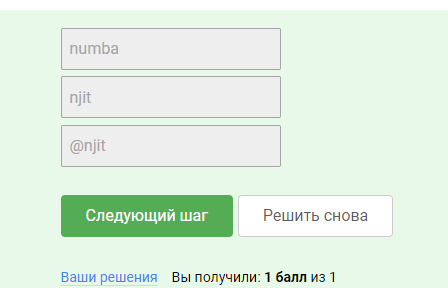

https://habr.com/ru/post/484136/